In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_1='/content/Table_LDN 1588_13.csv'
file_2='/content/Table_LDN 1588_9.csv'
file_3='/content/Table_LDN 1588_16.csv'
file_4='/content/Table_LDN 1588_17.csv'


catalogo_1 = pd.read_csv(file_1,delimiter=',',header=0)
catalogo_2 = pd.read_csv(file_2,delimiter=',',header=0)
catalogo_3 = pd.read_csv(file_3,delimiter=',',header=0)
catalogo_4 = pd.read_csv(file_4,delimiter=',',header=0)

In [ ]:
def err_mag1(file):
  cat_selected=file.loc[(file['1_mag_err_0']/file['1_mag_0']<=0.2)]
  return cat_selected

def err_mag2(file):
  cat_selected=file.loc[(file['2_mag_err_1']/file['2_mag_1']<=0.2)]
  return cat_selected

def err_mag3(file):
  cat_selected=file.loc[(file['3_mag_err_0']/file['3_mag_0']<=0.2)]
  return cat_selected

def err_mag4(file):
  cat_selected=file.loc[(file['4_mag_err_0']/file['4_mag_0']<=0.2)]
  return cat_selected

In [ ]:
cat1_err=err_mag1(catalogo_1).rename(columns={'1_mag_0': 'mag1'})
cat2_err=err_mag2(catalogo_2).rename(columns={'2_mag_1': 'mag2'})
cat3_err=err_mag3(catalogo_3).rename(columns={'3_mag_0': 'mag3'})
cat4_err=err_mag4(catalogo_4).rename(columns={'4_mag_0': 'mag4'})

In [ ]:
cat1= pd.merge(cat1_err, cat2_err, on='OBJECT_ID', how='inner')
cat2 = pd.merge(cat1, cat3_err, on='OBJECT_ID', how='inner')
cat_final = pd.merge(cat2, cat4_err, on='OBJECT_ID', how='inner')

<ipython-input-45-571c7a827631>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'DATE-OBS_2_mag_1_x', '1_mag_err_0_x', '3_mag_err_0_x', 'DATE-OBS_4_mag_0_x', '2_mag_err_1_x', 'RA_x', '4_mag_err_0_x', 'DATE-OBS_3_mag_0_x', 'DEC_x', 'DATE-OBS_1_mag_0_x'} in the result is deprecated and will raise a MergeError in a future version.
  cat_final = pd.merge(cat2, cat4_err, on='OBJECT_ID', how='inner')


In [ ]:
color_34=cat_final['mag1']-cat_final['mag2']
color_58=cat_final['mag3']-cat_final['mag4']

In [ ]:
color_58

0       0.299346
1       0.092039
2       1.662145
3       1.355769
4      -0.126550
          ...   
1262    0.564198
1263    1.022898
1264    0.354723
1265    0.684789
1266    0.782524
Length: 1267, dtype: float64

In [ ]:
tabla_color

,Color 3-4,Color 5-8
0,-0.106156,0.299346
1,-0.010704,0.092039
2,-1.024378,1.662145
3,-0.076944,1.355769
4,-0.022200,-0.126550
...,...,...
1262,-0.094542,0.564198
1263,-0.143823,1.022898
1264,-0.020130,0.354723
1265,0.060048,0.684789


In [ ]:
data = {'Color 3-4': color_34, 'Color 5-8': color_58}
tabla_color = pd.DataFrame(data)

In [ ]:
datos_filtrados = tabla_color[(tabla_color['Color 5-8'] >= 0.4) & (tabla_color['Color 5-8'] <= 1.1)
& (tabla_color['Color 3-4'] >= 0) & (tabla_color['Color 3-4'] <= 0.8)]

In [ ]:
datos_filtrados

,Color 3-4,Color 5-8
16,0.022929,0.835750
56,0.084814,0.484666
59,0.003767,0.415273
72,0.074364,0.572327
76,0.265454,0.768166
...,...,...
1242,0.017640,0.514830
1245,0.032452,0.609833
1250,0.012247,0.518297
1260,0.045841,0.872101


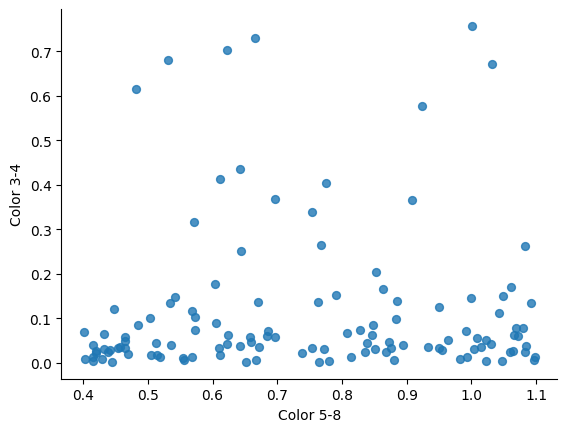

In [ ]:
from matplotlib import pyplot as plt
datos_filtrados.plot(kind='scatter', y='Color 3-4', x='Color 5-8', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

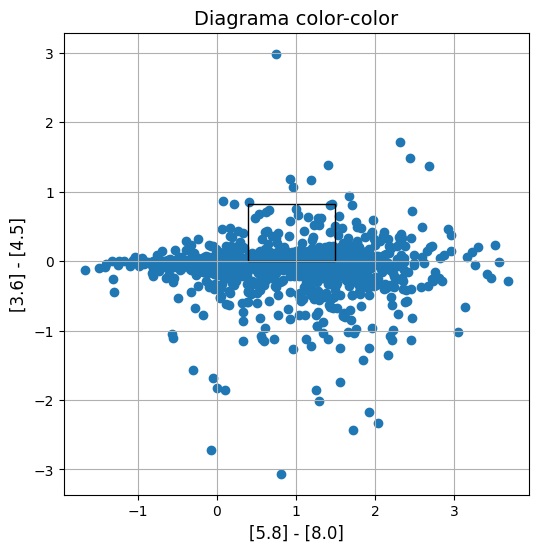

In [ ]:
plt.figure(figsize=(6, 6))

plt.scatter(color_58,color_34)
plt.title('Diagrama color-color',fontsize=14)
rectangle = plt.Rectangle((0.4,0), 1.1, 0.83, linestyle='-', fill= False)
plt.gca().add_patch(rectangle)
plt.xlabel('[5.8] - [8.0]',fontsize=12)
plt.ylabel('[3.6] - [4.5]',fontsize=12)
plt.grid(True)

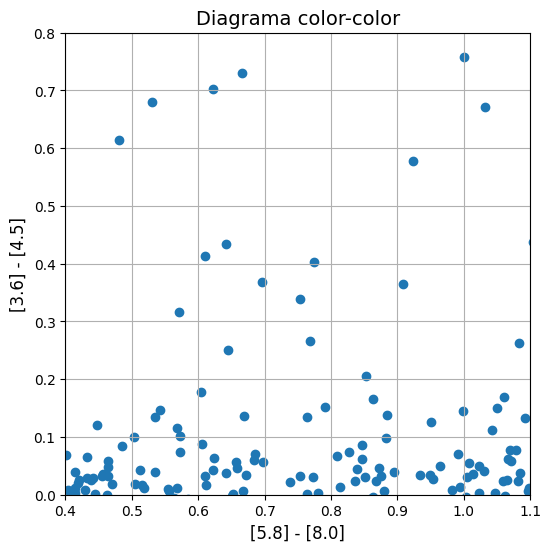

In [ ]:
plt.figure(figsize=(6, 6))

plt.scatter(color_58,color_34)
plt.title('Diagrama color-color',fontsize=14)
plt.xlabel('[5.8] - [8.0]',fontsize=12)
plt.ylabel('[3.6] - [4.5]',fontsize=12)
plt.xlim(0.4,1.1)
plt.ylim(0,0.8)
plt.grid(True)